In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
# Convert field names to dict for easy access.
# Can be hard coded 
# 
fields_path = '../../input/training_validation_2/fields.csv'  
fields_df = pd.read_csv(fields_path)
fields_df.columns = ['name', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6']

fields_dict = {}
fields_dictv2 = {}

for idx in range(fields_df.shape[0]):
    name = fields_df.loc[idx, 'name']

    _fields = []
    
    for f in fields_df.columns[1:]:
        if not (str(fields_df.loc[idx, f]) == 'nan'):
            _fields.append(name + "_" + str(fields_df.loc[idx, f]))
    
    fields_dict[idx] = {'name': fields_df.loc[idx, 'name'] , 'fields': _fields}
    fields_dictv2[name] = _fields
    
# fields_dict

In [17]:
feature_list = [fields_dict[46]['name']]
feature_list_regex= "|".join(["^"+f+"_" for f in feature_list])

feature_list

['VacuumFusePicked']

In [18]:
# import data
data_df_1 = pd.read_csv("../../data/training_validation_1.csv")
data_df_2 = pd.read_csv("../../data/training_validation_2.csv")
merged_df = pd.concat([data_df_1, data_df_2], axis=0) # Merge data frames


In [19]:
train_df = merged_df.filter(regex=feature_list_regex)
# train_df = train_df.filter(regex="vCnt|value")
# train_df = data_df_2.filter(regex="^Temperature")

In [20]:
train_df.head()

,VacuumFusePicked_vCnt,VacuumFusePicked_vFreq,VacuumFusePicked_vMax,VacuumFusePicked_vMin,VacuumFusePicked_vStd,VacuumFusePicked_vTrend,VacuumFusePicked_value
0,0,0.000000,NaN,NaN,NaN,NaN,NaN
1,39,3.865028,-0.440413,-0.646962,0.053119,-0.003199,-0.571752
2,54,5.341998,-0.421369,-0.635243,0.062087,0.002316,-0.551337
3,49,4.876176,-0.335917,-0.647938,0.103668,-0.005722,-0.523074
4,48,4.776871,-0.386212,-0.656728,0.064727,-0.000179,-0.558529


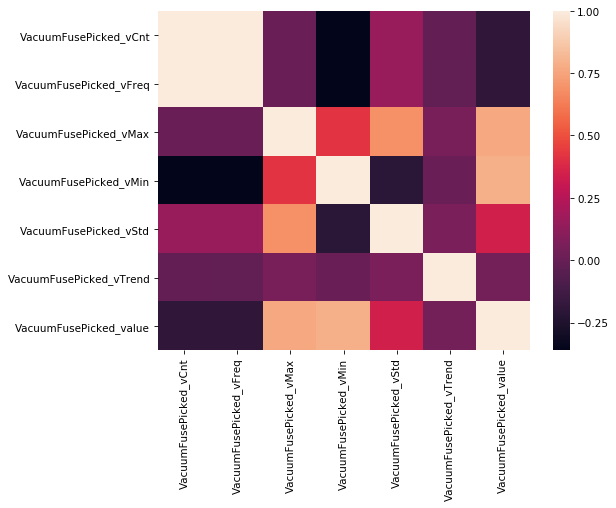

In [21]:
fig = plt.figure(figsize=(8,6), dpi=75)
sns.heatmap(train_df.corr(),annot=False)

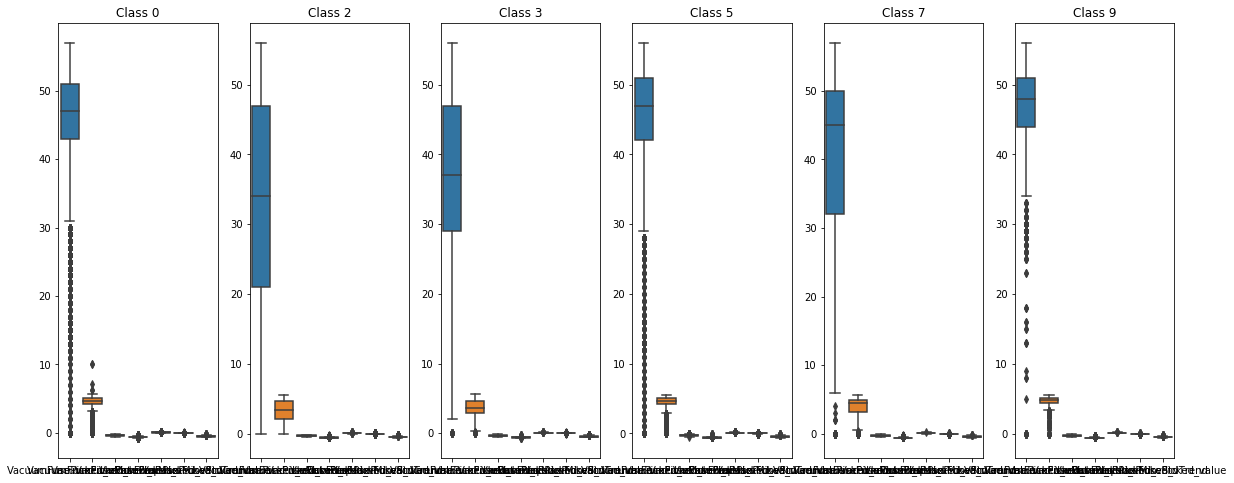

In [22]:
# fig = plt.figure(figsize=(10, 8), dpi=75)


classes = data_df_2['class'].unique()

fig, axes = plt.subplots(1, len(classes), sharex=True, figsize=(20,8))
# fig.suptitle('1 row x 2 columns axes with no data')

for idx, c in enumerate(classes):
    df = train_df[merged_df['class'] == c].copy()
#     df = train_df.copy()
    sns.boxplot(data=df, ax=axes[idx])
    axes[idx].set_title('Class '+str(c))


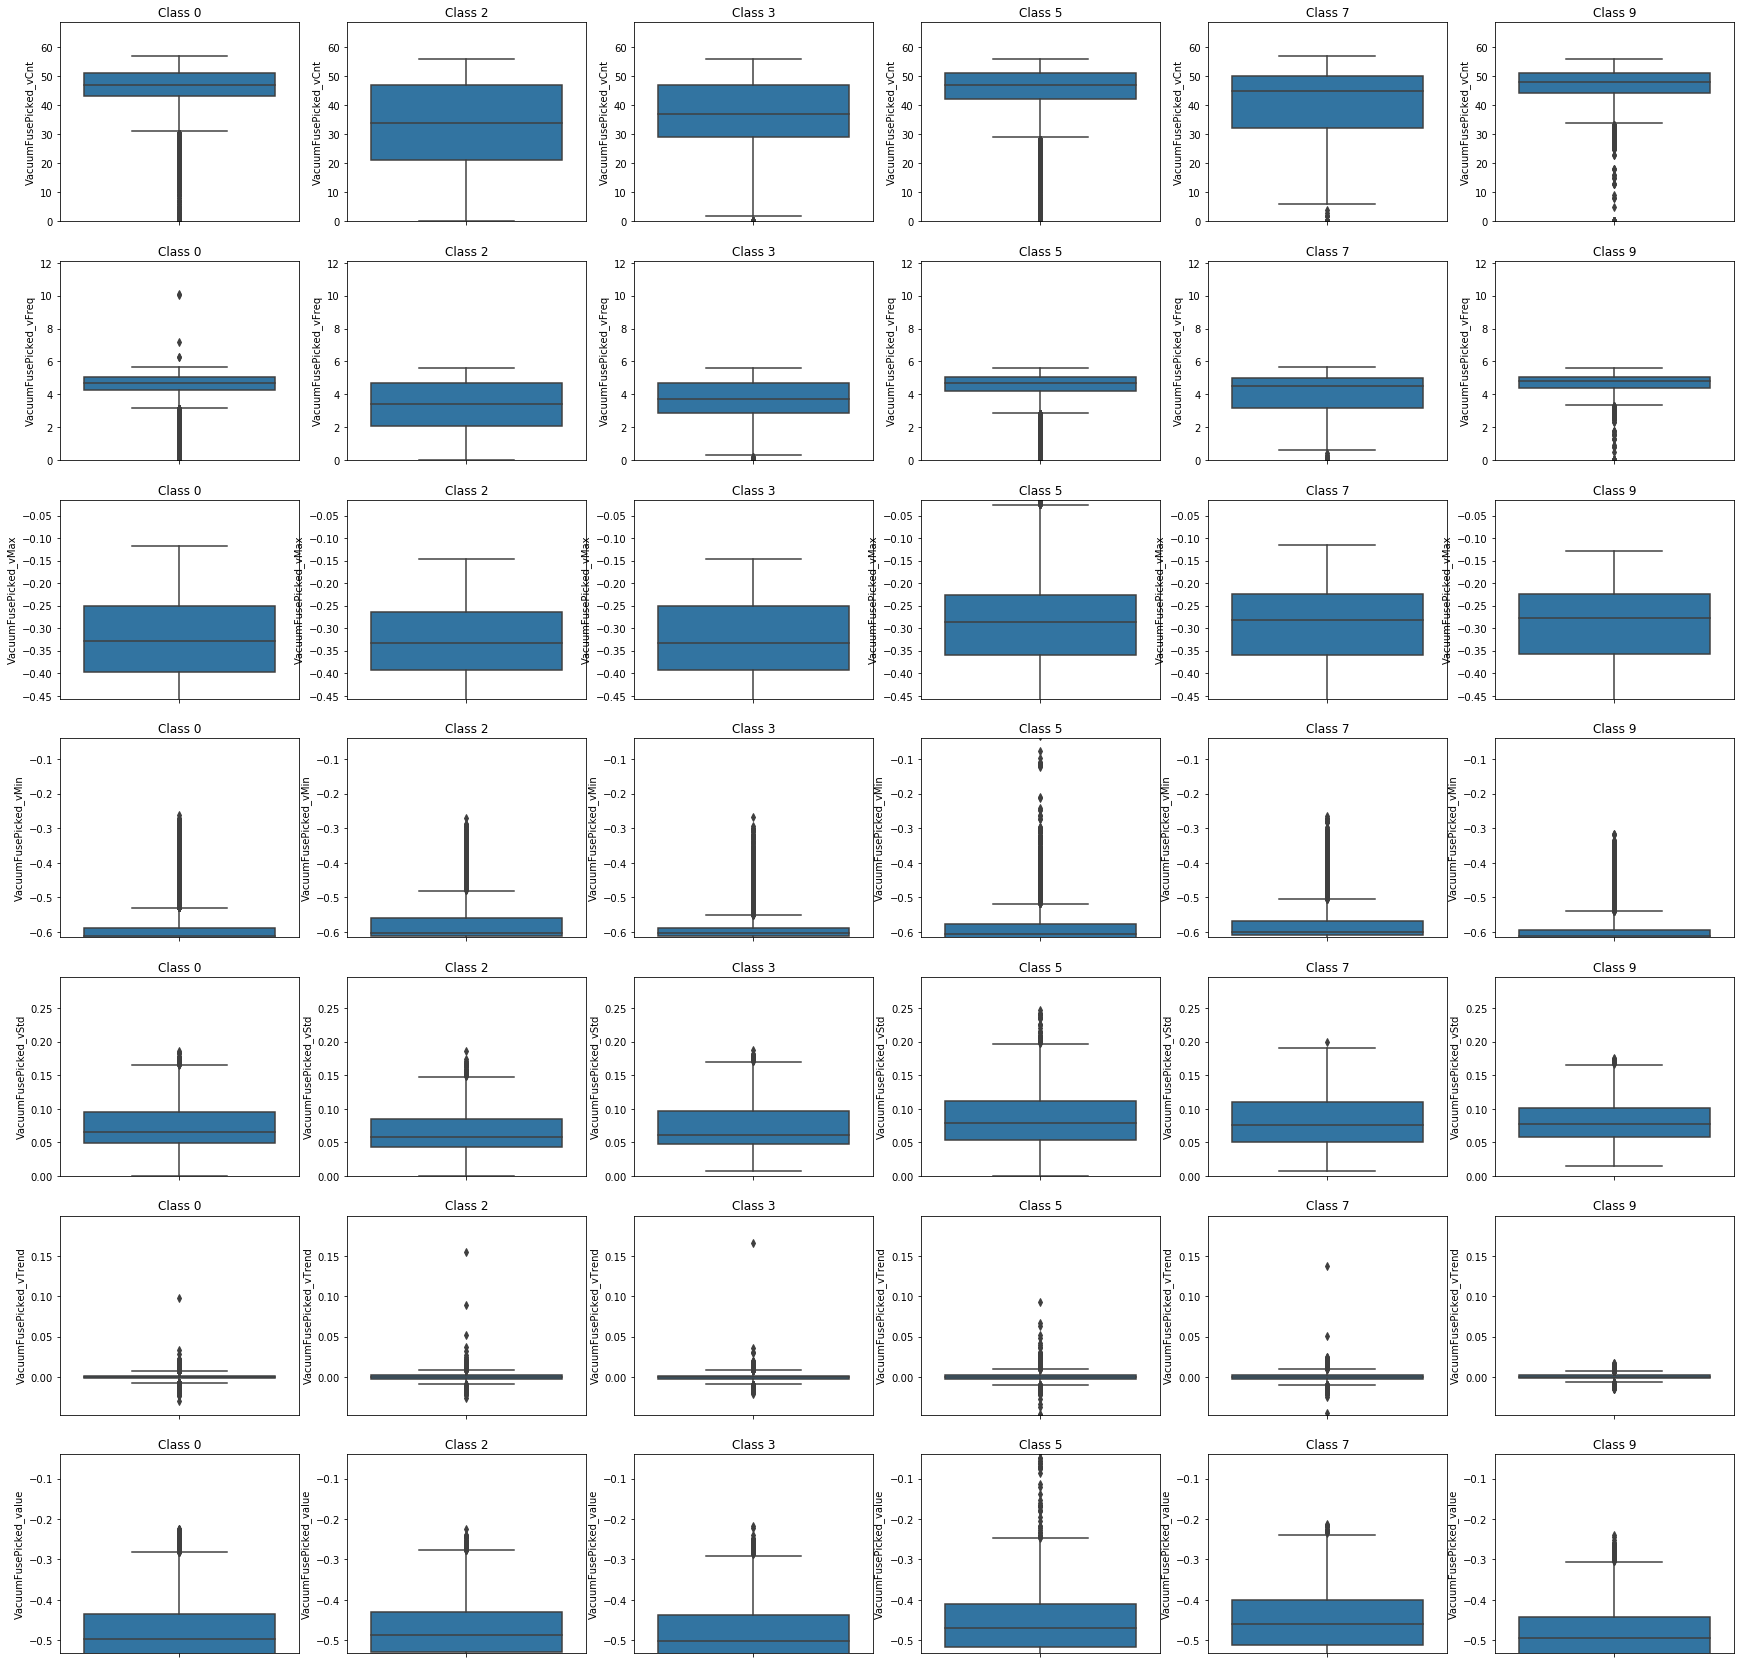

In [23]:
# fig = plt.figure(figsize=(10, 8), dpi=75)


classes = data_df_2['class'].unique()
features = train_df.columns

fig, axes = plt.subplots(len(features), len(classes), sharex=True, figsize=(30,30))
# print (axes)
# fig.suptitle('1 row x 2 columns axes with no data')

for idx1, f in enumerate(features):
    df = merged_df[[f, 'class']].copy()
    for idx2, c in enumerate(classes):
        df2 = df[df['class'] == c].copy()
#         print (f, c, df2.columns)
        sns.boxplot(y=df2[f], ax=axes[idx1, idx2])
        axes[idx1, idx2].set_title('Class '+str(c))
        axes[idx1, idx2].set_ylim(0.8*df[f].min(), 1.2*df[f].max())


In [24]:
# classes = data_df_2['class'].unique()
# features = train_df.columns

# fig, axes = plt.subplots(len(features), 1, sharex=True, figsize=(30,16))

# for idx1, f in enumerate(features):
#     df = data_df_2[[f, 'class']].copy()
#     axes[idx1].set_title('Feature '+str(f))
#     for idx2, c in enumerate(classes):
#         df2 = df[df['class'] == c].copy()
#         axes[idx1].boxplot(x=df2[f], positions=[idx2], labels=[c])
    


In [25]:
# train_df2 = pd.concat([data_df_2['class'], train_df], axis=1)
# axes = train_df2.groupby('class').boxplot(figsize=(20, 10))

In [26]:
classes = data_df_2['class'].unique()
features = train_df.columns

new_df = pd.DataFrame()

df_list = []

for idx1, f in enumerate(features):
    df = merged_df[[f, 'class']].copy()
    data = [[
        99, f, df[f].max(), df[f].min(), df[f].std(), df[f].mean(), df[f].median(), df[f].count(), df[f].isna().sum(),
        ]]

    data_df = pd.DataFrame(data)

    df_list.append(data_df)

    for idx2, c in enumerate(classes):
        df2 = df[df['class'] == c].copy()

        data = [[
            c, f, df2[f].max(), df2[f].min(), df2[f].std(), df2[f].mean(), df2[f].median(), df2[f].count(), df2[f].isna().sum(),
            ]]
        
        data_df = pd.DataFrame(data)
        df_list.append(data_df)
        
new_df = pd.concat(df_list, axis=0)
        
new_df.columns = ['class', 'feature', 'max', 'min', 'std', 'mean', 'median', 'Count', 'NA_count']

In [27]:
new_df[new_df['class']==99]

,class,feature,max,min,std,mean,median,Count,NA_count
0,99,VacuumFusePicked_vCnt,57.000000,0.000000,10.558293,43.476989,47.000000,39611,0
0,99,VacuumFusePicked_vFreq,10.085999,0.000000,1.051220,4.327424,4.674617,39611,0
0,99,VacuumFusePicked_vMax,-0.012665,-0.570299,0.086377,-0.320193,-0.319315,39148,463
0,99,VacuumFusePicked_vMin,-0.033662,-0.769036,0.066136,-0.587226,-0.608386,39148,463
0,99,VacuumFusePicked_vStd,0.246755,0.000000,0.032908,0.075795,0.067616,39148,463
0,99,VacuumFusePicked_vTrend,0.166509,-0.058596,0.004598,-0.000099,-0.000197,39132,479
0,99,VacuumFusePicked_value,-0.033662,-0.665188,0.077623,-0.473535,-0.492193,39148,463


In [28]:
missing = 0

for c in classes:
    class_df = merged_df[merged_df['class']==c]
    runs = class_df['run'].unique()
    for r in runs:
        run_df = class_df[class_df['run'] == r]
        for f in features:
            f_df = run_df.filter([f]).copy().reset_index()
            del f_df['index']
            l = len(f_df)
            n_df = f_df[f_df[f].isna()]
#             if len(f_df) != len(n_df): print (c, r, f, len(f_df), len(n_df))
            if (len(n_df) == 0): continue
            missing += len(n_df)
            for i in list(n_df.index):
                if ((i == 0) | (i == l-1)): 
                    print ('NA at start or end')
                else:
                    print (c, r, f, len(f_df), list(n_df.index))
print (missing)

NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
0 17 VacuumFusePicked_vMax 362 [0, 1, 361]
NA at start or end
NA at start or end
0 17 VacuumFusePicked_vMin 362 [0, 1, 361]
NA at start or end
NA at start or end
0 17 VacuumFusePicked_vStd 362 [0, 1, 361]
NA at start or end
NA at start or end
0 17 VacuumFusePicked_vTrend 362 [0, 1, 361]
NA at start or end
NA at start or end
0 17 VacuumFusePicked_value 362 [0, 1, 361]
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA 

NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
0 60 VacuumFusePicked_vMax 1081 [0, 1, 2, 3, 1080]
0 60 VacuumFusePicked_vMax 1081 [0, 1, 2, 3, 1080]
0 60 VacuumFusePicked_vMax 1081 [0, 1, 2, 3, 1080]
NA at start or end
NA at start or end
0 60 VacuumFusePicked_vMin 1081 [0, 1, 2, 3, 1080]
0 60 VacuumFusePicked_vMin 1081 [0, 1, 2, 3, 1080]
0 60 VacuumFusePicked_vMin 1081 [0, 1, 2, 3, 1080]
NA at start or end
NA at start or end
0 60 VacuumFusePicked_vStd 1081 [0, 1, 2, 3, 1080]
0 60 VacuumFusePicked_vStd 1081 [0, 1, 2, 3, 1080]
0 60 VacuumFusePicked_vStd 1081 [0, 1, 2, 3, 1080]
NA at start or end
NA at start or end
0 60 VacuumFusePicked_vTrend 1081 [0, 1, 2, 3, 1080]
0 60 VacuumFusePicked_vTrend 1081 [0, 1, 2, 3, 1080]
0 60 VacuumFusePicked_vTrend 1081 [0, 1, 2, 3, 1080]
NA at start or end
NA at start or end
0 60 VacuumFusePicked_value 1081 [0, 1, 2, 3, 1080]
0 60 VacuumFusePicked_value 1081 [0, 1, 2, 3, 1080]
0 60 VacuumF

NA at start or end
0 81 VacuumFusePicked_vMax 361 [0, 227, 360]
NA at start or end
NA at start or end
0 81 VacuumFusePicked_vMin 361 [0, 227, 360]
NA at start or end
NA at start or end
0 81 VacuumFusePicked_vStd 361 [0, 227, 360]
NA at start or end
NA at start or end
0 81 VacuumFusePicked_vTrend 361 [0, 227, 360]
NA at start or end
NA at start or end
0 81 VacuumFusePicked_value 361 [0, 227, 360]
NA at start or end
0 83 VacuumFusePicked_vMax 361 [359, 360]
NA at start or end
0 83 VacuumFusePicked_vMin 361 [359, 360]
NA at start or end
0 83 VacuumFusePicked_vStd 361 [359, 360]
NA at start or end
0 83 VacuumFusePicked_vTrend 361 [359, 360]
NA at start or end
0 83 VacuumFusePicked_value 361 [359, 360]
NA at start or end
NA at start or end
0 86 VacuumFusePicked_vMax 361 [0, 106, 359, 360]
0 86 VacuumFusePicked_vMax 361 [0, 106, 359, 360]
NA at start or end
NA at start or end
0 86 VacuumFusePicked_vMin 361 [0, 106, 359, 360]
0 86 VacuumFusePicked_vMin 361 [0, 106, 359, 360]
NA at start or en

2 0 VacuumFusePicked_vTrend 361 [0, 24, 58, 60, 62, 166, 211, 230, 300, 360]
2 0 VacuumFusePicked_vTrend 361 [0, 24, 58, 60, 62, 166, 211, 230, 300, 360]
2 0 VacuumFusePicked_vTrend 361 [0, 24, 58, 60, 62, 166, 211, 230, 300, 360]
2 0 VacuumFusePicked_vTrend 361 [0, 24, 58, 60, 62, 166, 211, 230, 300, 360]
2 0 VacuumFusePicked_vTrend 361 [0, 24, 58, 60, 62, 166, 211, 230, 300, 360]
NA at start or end
NA at start or end
2 0 VacuumFusePicked_value 361 [0, 24, 58, 60, 62, 166, 211, 230, 300, 360]
2 0 VacuumFusePicked_value 361 [0, 24, 58, 60, 62, 166, 211, 230, 300, 360]
2 0 VacuumFusePicked_value 361 [0, 24, 58, 60, 62, 166, 211, 230, 300, 360]
2 0 VacuumFusePicked_value 361 [0, 24, 58, 60, 62, 166, 211, 230, 300, 360]
2 0 VacuumFusePicked_value 361 [0, 24, 58, 60, 62, 166, 211, 230, 300, 360]
2 0 VacuumFusePicked_value 361 [0, 24, 58, 60, 62, 166, 211, 230, 300, 360]
2 0 VacuumFusePicked_value 361 [0, 24, 58, 60, 62, 166, 211, 230, 300, 360]
2 0 VacuumFusePicked_value 361 [0, 24, 58, 60

2 3 VacuumFusePicked_vMax 1035 [0, 1, 2, 3, 28, 33, 34, 38, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 64, 65, 66, 72, 73, 74, 75, 115, 119, 120, 121, 123, 125, 126, 127, 130, 169, 170, 171, 172, 177, 178, 179, 182, 188, 190, 196, 199, 211, 212, 214, 215, 216, 217, 218, 222, 223, 224, 225, 359, 360, 367, 368, 370, 373, 374, 376, 378, 402, 404, 409, 417, 450, 459, 460, 467, 473, 525, 530, 535, 538, 539, 543, 567, 568, 569, 570, 576, 578, 580, 584, 585, 644, 651, 656, 657, 659, 661, 662, 665, 667, 711, 712, 762, 771, 823, 824, 827, 884, 890, 896, 898, 902, 903, 905, 925, 926, 933, 934, 966, 974, 976, 1015, 1026, 1027, 1028, 1029, 1030, 1031]
2 3 VacuumFusePicked_vMax 1035 [0, 1, 2, 3, 28, 33, 34, 38, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 64, 65, 66, 72, 73, 74, 75, 115, 119, 120, 121, 123, 125, 126, 127, 130, 169, 170, 171, 172, 177, 178, 179, 182, 188, 190, 196, 199, 211, 212, 214, 215, 216, 217, 218, 222, 223, 224, 225, 359, 360, 367, 368, 370, 37

2 3 VacuumFusePicked_vMin 1035 [0, 1, 2, 3, 28, 33, 34, 38, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 64, 65, 66, 72, 73, 74, 75, 115, 119, 120, 121, 123, 125, 126, 127, 130, 169, 170, 171, 172, 177, 178, 179, 182, 188, 190, 196, 199, 211, 212, 214, 215, 216, 217, 218, 222, 223, 224, 225, 359, 360, 367, 368, 370, 373, 374, 376, 378, 402, 404, 409, 417, 450, 459, 460, 467, 473, 525, 530, 535, 538, 539, 543, 567, 568, 569, 570, 576, 578, 580, 584, 585, 644, 651, 656, 657, 659, 661, 662, 665, 667, 711, 712, 762, 771, 823, 824, 827, 884, 890, 896, 898, 902, 903, 905, 925, 926, 933, 934, 966, 974, 976, 1015, 1026, 1027, 1028, 1029, 1030, 1031]
2 3 VacuumFusePicked_vMin 1035 [0, 1, 2, 3, 28, 33, 34, 38, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 64, 65, 66, 72, 73, 74, 75, 115, 119, 120, 121, 123, 125, 126, 127, 130, 169, 170, 171, 172, 177, 178, 179, 182, 188, 190, 196, 199, 211, 212, 214, 215, 216, 217, 218, 222, 223, 224, 225, 359, 360, 367, 368, 370, 37

NA at start or end
2 3 VacuumFusePicked_vTrend 1035 [0, 1, 2, 3, 28, 33, 34, 38, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 64, 65, 66, 72, 73, 74, 75, 115, 119, 120, 121, 123, 125, 126, 127, 130, 169, 170, 171, 172, 177, 178, 179, 182, 188, 190, 196, 199, 211, 212, 214, 215, 216, 217, 218, 222, 223, 224, 225, 276, 359, 360, 367, 368, 370, 373, 374, 376, 378, 402, 404, 409, 417, 450, 459, 460, 467, 473, 525, 530, 535, 538, 539, 543, 567, 568, 569, 570, 576, 578, 580, 583, 584, 585, 644, 651, 656, 657, 659, 661, 662, 665, 667, 711, 712, 762, 771, 823, 824, 827, 884, 890, 896, 898, 902, 903, 905, 925, 926, 933, 934, 966, 974, 976, 1015, 1026, 1027, 1028, 1029, 1030, 1031]
2 3 VacuumFusePicked_vTrend 1035 [0, 1, 2, 3, 28, 33, 34, 38, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 64, 65, 66, 72, 73, 74, 75, 115, 119, 120, 121, 123, 125, 126, 127, 130, 169, 170, 171, 172, 177, 178, 179, 182, 188, 190, 196, 199, 211, 212, 214, 215, 216, 217, 218, 222, 223, 224,

2 3 VacuumFusePicked_value 1035 [0, 1, 2, 3, 28, 33, 34, 38, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 64, 65, 66, 72, 73, 74, 75, 115, 119, 120, 121, 123, 125, 126, 127, 130, 169, 170, 171, 172, 177, 178, 179, 182, 188, 190, 196, 199, 211, 212, 214, 215, 216, 217, 218, 222, 223, 224, 225, 359, 360, 367, 368, 370, 373, 374, 376, 378, 402, 404, 409, 417, 450, 459, 460, 467, 473, 525, 530, 535, 538, 539, 543, 567, 568, 569, 570, 576, 578, 580, 584, 585, 644, 651, 656, 657, 659, 661, 662, 665, 667, 711, 712, 762, 771, 823, 824, 827, 884, 890, 896, 898, 902, 903, 905, 925, 926, 933, 934, 966, 974, 976, 1015, 1026, 1027, 1028, 1029, 1030, 1031]
2 3 VacuumFusePicked_value 1035 [0, 1, 2, 3, 28, 33, 34, 38, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 64, 65, 66, 72, 73, 74, 75, 115, 119, 120, 121, 123, 125, 126, 127, 130, 169, 170, 171, 172, 177, 178, 179, 182, 188, 190, 196, 199, 211, 212, 214, 215, 216, 217, 218, 222, 223, 224, 225, 359, 360, 367, 368, 370, 

2 4 VacuumFusePicked_vTrend 360 [80, 92, 93, 97, 105, 121, 134, 136, 138, 139, 140, 169, 192, 197, 198, 218, 224, 231, 256, 258, 285, 293, 297, 339, 350, 359]
2 4 VacuumFusePicked_vTrend 360 [80, 92, 93, 97, 105, 121, 134, 136, 138, 139, 140, 169, 192, 197, 198, 218, 224, 231, 256, 258, 285, 293, 297, 339, 350, 359]
2 4 VacuumFusePicked_vTrend 360 [80, 92, 93, 97, 105, 121, 134, 136, 138, 139, 140, 169, 192, 197, 198, 218, 224, 231, 256, 258, 285, 293, 297, 339, 350, 359]
2 4 VacuumFusePicked_vTrend 360 [80, 92, 93, 97, 105, 121, 134, 136, 138, 139, 140, 169, 192, 197, 198, 218, 224, 231, 256, 258, 285, 293, 297, 339, 350, 359]
2 4 VacuumFusePicked_vTrend 360 [80, 92, 93, 97, 105, 121, 134, 136, 138, 139, 140, 169, 192, 197, 198, 218, 224, 231, 256, 258, 285, 293, 297, 339, 350, 359]
2 4 VacuumFusePicked_vTrend 360 [80, 92, 93, 97, 105, 121, 134, 136, 138, 139, 140, 169, 192, 197, 198, 218, 224, 231, 256, 258, 285, 293, 297, 339, 350, 359]
2 4 VacuumFusePicked_vTrend 360 [80, 92, 93, 9

NA at start or end
3 2 VacuumFusePicked_vStd 1079 [0, 1, 2, 3, 245, 269, 280, 537, 566, 809]
3 2 VacuumFusePicked_vStd 1079 [0, 1, 2, 3, 245, 269, 280, 537, 566, 809]
3 2 VacuumFusePicked_vStd 1079 [0, 1, 2, 3, 245, 269, 280, 537, 566, 809]
3 2 VacuumFusePicked_vStd 1079 [0, 1, 2, 3, 245, 269, 280, 537, 566, 809]
3 2 VacuumFusePicked_vStd 1079 [0, 1, 2, 3, 245, 269, 280, 537, 566, 809]
3 2 VacuumFusePicked_vStd 1079 [0, 1, 2, 3, 245, 269, 280, 537, 566, 809]
3 2 VacuumFusePicked_vStd 1079 [0, 1, 2, 3, 245, 269, 280, 537, 566, 809]
3 2 VacuumFusePicked_vStd 1079 [0, 1, 2, 3, 245, 269, 280, 537, 566, 809]
3 2 VacuumFusePicked_vStd 1079 [0, 1, 2, 3, 245, 269, 280, 537, 566, 809]
NA at start or end
3 2 VacuumFusePicked_vTrend 1079 [0, 1, 2, 3, 245, 269, 280, 537, 566, 809]
3 2 VacuumFusePicked_vTrend 1079 [0, 1, 2, 3, 245, 269, 280, 537, 566, 809]
3 2 VacuumFusePicked_vTrend 1079 [0, 1, 2, 3, 245, 269, 280, 537, 566, 809]
3 2 VacuumFusePicked_vTrend 1079 [0, 1, 2, 3, 245, 269, 280, 537, 56

5 3 VacuumFusePicked_vMin 1079 [0, 1, 2, 319, 417, 689, 885, 907, 1016, 1078]
5 3 VacuumFusePicked_vMin 1079 [0, 1, 2, 319, 417, 689, 885, 907, 1016, 1078]
5 3 VacuumFusePicked_vMin 1079 [0, 1, 2, 319, 417, 689, 885, 907, 1016, 1078]
NA at start or end
NA at start or end
5 3 VacuumFusePicked_vStd 1079 [0, 1, 2, 319, 417, 689, 885, 907, 1016, 1078]
5 3 VacuumFusePicked_vStd 1079 [0, 1, 2, 319, 417, 689, 885, 907, 1016, 1078]
5 3 VacuumFusePicked_vStd 1079 [0, 1, 2, 319, 417, 689, 885, 907, 1016, 1078]
5 3 VacuumFusePicked_vStd 1079 [0, 1, 2, 319, 417, 689, 885, 907, 1016, 1078]
5 3 VacuumFusePicked_vStd 1079 [0, 1, 2, 319, 417, 689, 885, 907, 1016, 1078]
5 3 VacuumFusePicked_vStd 1079 [0, 1, 2, 319, 417, 689, 885, 907, 1016, 1078]
5 3 VacuumFusePicked_vStd 1079 [0, 1, 2, 319, 417, 689, 885, 907, 1016, 1078]
5 3 VacuumFusePicked_vStd 1079 [0, 1, 2, 319, 417, 689, 885, 907, 1016, 1078]
NA at start or end
NA at start or end
5 3 VacuumFusePicked_vTrend 1079 [0, 1, 2, 3, 319, 417, 689, 885, 

NA at start or end
7 3 VacuumFusePicked_vMax 1079 [0, 1, 2, 558, 781, 796, 1078]
7 3 VacuumFusePicked_vMax 1079 [0, 1, 2, 558, 781, 796, 1078]
7 3 VacuumFusePicked_vMax 1079 [0, 1, 2, 558, 781, 796, 1078]
7 3 VacuumFusePicked_vMax 1079 [0, 1, 2, 558, 781, 796, 1078]
7 3 VacuumFusePicked_vMax 1079 [0, 1, 2, 558, 781, 796, 1078]
NA at start or end
NA at start or end
7 3 VacuumFusePicked_vMin 1079 [0, 1, 2, 558, 781, 796, 1078]
7 3 VacuumFusePicked_vMin 1079 [0, 1, 2, 558, 781, 796, 1078]
7 3 VacuumFusePicked_vMin 1079 [0, 1, 2, 558, 781, 796, 1078]
7 3 VacuumFusePicked_vMin 1079 [0, 1, 2, 558, 781, 796, 1078]
7 3 VacuumFusePicked_vMin 1079 [0, 1, 2, 558, 781, 796, 1078]
NA at start or end
NA at start or end
7 3 VacuumFusePicked_vStd 1079 [0, 1, 2, 558, 781, 796, 1078]
7 3 VacuumFusePicked_vStd 1079 [0, 1, 2, 558, 781, 796, 1078]
7 3 VacuumFusePicked_vStd 1079 [0, 1, 2, 558, 781, 796, 1078]
7 3 VacuumFusePicked_vStd 1079 [0, 1, 2, 558, 781, 796, 1078]
7 3 VacuumFusePicked_vStd 1079 [0, 1,

9 5 VacuumFusePicked_vMax 361 [290, 359, 360]
9 5 VacuumFusePicked_vMax 361 [290, 359, 360]
NA at start or end
9 5 VacuumFusePicked_vMin 361 [290, 359, 360]
9 5 VacuumFusePicked_vMin 361 [290, 359, 360]
NA at start or end
9 5 VacuumFusePicked_vStd 361 [290, 359, 360]
9 5 VacuumFusePicked_vStd 361 [290, 359, 360]
NA at start or end
9 5 VacuumFusePicked_vTrend 361 [290, 359, 360]
9 5 VacuumFusePicked_vTrend 361 [290, 359, 360]
NA at start or end
9 5 VacuumFusePicked_value 361 [290, 359, 360]
9 5 VacuumFusePicked_value 361 [290, 359, 360]
NA at start or end
2331
